In [6]:
"""
Name : Tushar Sudhakar Patekar
Class : TY
RollNo : 46
Batch : T2
"""


import pandas as pd 
import numpy as np

df = pd.read_csv('book.csv')
df.head()
df.tail()
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(to_drop, inplace=True, axis=1)
df.head()

df.drop(columns=to_drop, inplace=True)
df.head()
df['Identifier'].is_unique
df = df.set_index('Identifier')
df.head()
df.loc[206]
df.set_index('Identifier', inplace=True)
df.get_dtype_counts()
df.loc[1905:, 'Date of Publication'].head(10)
df['Date of Publication'] = pd.to_numeric(extr)
df['Date of Publication'].dtype
df['Date of Publication'].isnull().sum() / len(df)
df['Date of Publication'].isnull().sum() / len(df)
pub = df['Place of Publication']
london = pub.str.contains('London')
london[:5]








oxford = pub.str.contains('Oxford')


In [24]:
import pandas as pd

james_bond_data = pd.read_csv("jamesbond.csv").convert_dtypes()

james_bond_data.head()
new_column_names = {
    "Release": "release_date",
    "Movie": "movie_title",
    "Bond": "bond_actor",
    "Bond_Car_MFG": "car_manufacturer",
    "US_Gross": "income_usa",
    "World_Gross": "income_world",
    "Budget ($ 000s)": "movie_budget",
    "Film_Length": "film_length",
    "Avg_User_IMDB": "imdb",
    "Avg_User_Rtn_Tom": "rotten_tomatoes",
    "Martinis": "martinis_consumed",
    "Kills_Bond": "bond_kills",
}
#  data = james_bond_data.rename(columns=new_column_names)

# data.columns
# data.info()
# data.loc[data.isna().any(axis="columns")]
# data = james_bond_data.rename(columns=new_column_names).combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
# # pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}})

# data[
#     ["income_usa", "income_world", "movie_budget", "film_length"]
# ].head()

data = (
    james_bond_data.rename(columns=new_column_names)
    .combine_first(
        pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}})
    )
    .assign(
        income_usa=lambda data: (
            data["income_usa"]
            .replace("[$,]", "", regex=True)
            .astype("Float64")
        ),
    )
)

data["bond_actor"].value_counts()
data[["film_length", "martinis_consumed"]].describe()
data.loc[data.duplicated(keep=False)]
data.to_csv("james_bond_data_cleansed.csv", index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8220\855618565.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Admin\AppData\Local\Temp\ipykernel_8220\855618565.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Admin\AppData\Local\Temp\ipykernel_8220\855618565.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


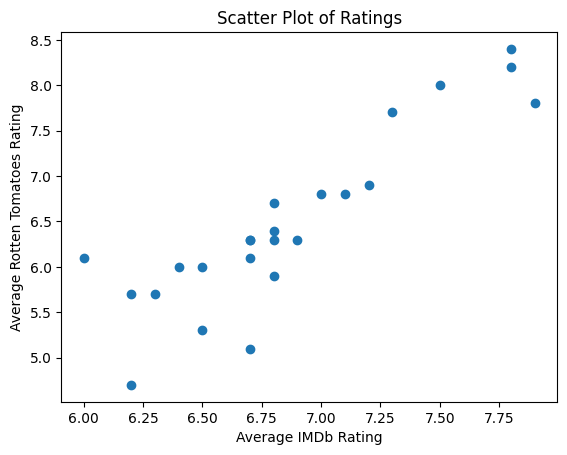

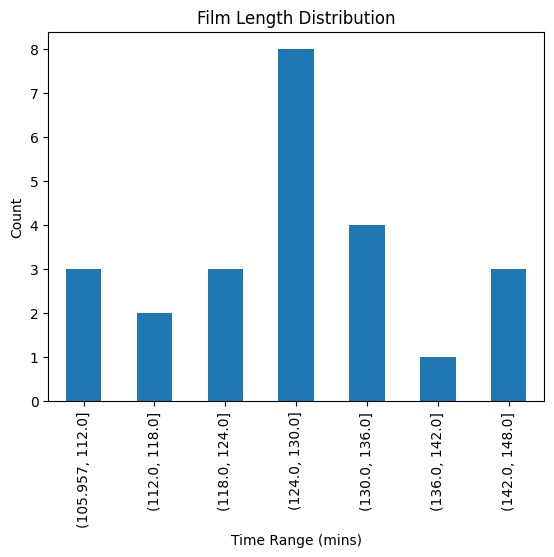

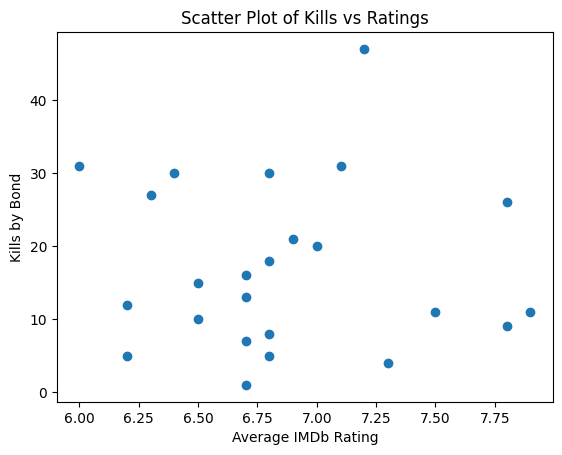

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("james_bond_data_cleansed.csv").convert_dtypes()
fig, ax = plt.subplots()
ax.scatter(data["imdb"], data["rotten_tomatoes"])
ax.set_title("Scatter Plot of Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Average Rotten Tomatoes Rating")
fig.show()

# from sklearn.linear_model import LinearRegression

# x = data.loc[:, ["imdb"]]
# y = data.loc[:, "rotten_tomatoes"]

fig, ax = plt.subplots()
length = data["film_length"].value_counts(bins=7).sort_index()
length.plot.bar(
    ax=ax,
    title="Film Length Distribution",
    xlabel="Time Range (mins)",
    ylabel="Count",
)
fig.show()
data["film_length"].agg(["min", "max", "mean", "std"])
fig, ax = plt.subplots()
ax.scatter(data["imdb"], data["bond_kills"])
ax.set_title("Scatter Plot of Kills vs Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Kills by Bond")
fig.show()